In [17]:
import pandas as pd
import numpy as np

wine = pd.read_csv("winemag dataset.csv")
wine.drop_duplicates(subset=None, keep='first', inplace=True)
wine.dropna(axis=0, how='any', subset=['variety'], inplace=True) 
wine['description'] = wine['description'].str.lower()
wine['variety'] = wine['variety'].str.lower()

In [18]:
print(wine.shape)
wine.head(3)

(137325, 9)


,points,title,description,taster_name,price,variety,province,country,winery
0,89,Argiolas 2017 Perdera (Monica di Sardegna),"fragrant blue flower, mediterranean herb and w...",Kerin O’Keefe,19.0,red blends,Sicily & Sardinia,Italy,Argiolas
1,89,Argiolas 2018 Costamolino (Vermentino di Sard...,spring blossom and yellow stone fruit aromas m...,Kerin O’Keefe,19.0,vermentino,Sicily & Sardinia,Italy,Argiolas
2,89,"Bushong 2017 Power, Corruption & Lies Red (Pas...","deep, dark and intense aromas of blackberry me...",Matt Kettmann,43.0,rhône-style red blend,California,US,Bushong


In [19]:
data = wine.groupby('variety').filter(lambda x: len(x) > 3000).reset_index(drop=True)
data['variety'].unique()     # just select some varieties appears more than 3000 times (11 types)

array(['riesling', 'cabernet sauvignon', 'bordeaux-style red blend',
       'merlot', 'chardonnay', 'sauvignon blanc', 'pinot noir', 'rosé',
       'nebbiolo', 'syrah', 'red blend'], dtype=object)

<AxesSubplot:title={'center':'Number of descriptions per Variety'}, xlabel='variety', ylabel='count'>

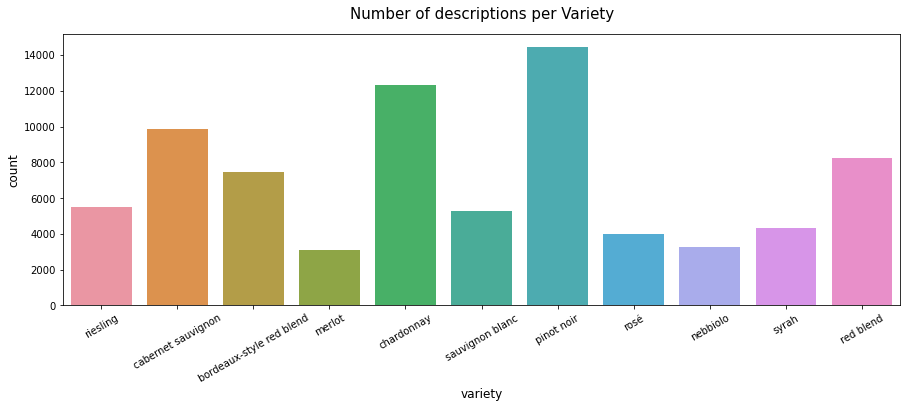

In [20]:
import matplotlib.pyplot as plt  
import seaborn as sns

plt.figure(figsize=(15,5))     
plt.title('Number of descriptions per Variety', size=15, pad=15)   
plt.xlabel('variety', fontsize=12) 
plt.xticks(rotation=30) 
plt.ylabel('count', fontsize=12) 
sns.set_color_codes("pastel")
sns.countplot(x="variety", data=data)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import stop_words
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('[a-z]+')        
stops = set(stop_words.ENGLISH_STOP_WORDS)   
wines = set([w for v in wine['variety'].unique() for w in tokenizer.tokenize(v.lower())])  
sets = set(['wine','wines','red','white','flavors','flavor','drink','zin'])

stopwords = stops | wines | sets      # update the stopwords

In [10]:
from sklearn.model_selection import train_test_split

df_X = data['description']
df_y = data['variety']
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.25, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(58371,) (19457,) (58371,) (19457,)


In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

vect = TfidfVectorizer(min_df=5, max_df=0.9, stop_words = stopwords, 
                       lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Model_1: Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter = 5000)    
%time logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
accuracy1 = accuracy_score(y_test, y_pred_class)
print('\nMode_1: Logistic Regression')
print('Accuracy: %.2f%%' % (accuracy1 * 100.0))

CPU times: user 1min 15s, sys: 19.3 s, total: 1min 34s
Wall time: 14.8 s

Mode_1: Logistic Regression
Accuracy: 70.12%


# Model_2: Linear SVM

In [13]:
from sklearn.svm import LinearSVC

svm_linear = LinearSVC(max_iter = 5000)
%time svm_linear.fit(X_train_dtm, y_train)
y_pred_class = svm_linear.predict(X_test_dtm)
accuracy2 = accuracy_score(y_test, y_pred_class)
print('\nMode_2: Linear SVM')
print('Accuracy: %.2f%%' % (accuracy2 * 100.0))

CPU times: user 3.51 s, sys: 43.9 ms, total: 3.55 s
Wall time: 3.59 s

Mode_2: Linear SVM
Accuracy: 69.29%


# Model_3: Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

dfc = DecisionTreeClassifier()
%time dfc.fit(X_train_dtm, y_train)
y_pred_class = dfc.predict(X_test_dtm)
accuracy3 = accuracy_score(y_test, y_pred_class)
print('\nModel_3: Decision Tree')
print('Accuracy: %.2f%%' % (accuracy3 * 100.0))

CPU times: user 33 s, sys: 221 ms, total: 33.2 s
Wall time: 33.5 s

Model_3: Decision Tree
Accuracy: 48.74%


# Model_4: Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_features="auto", random_state=0)
%time rfc.fit(X_train_dtm, y_train)
y_pred_class = rfc.predict(X_test_dtm)
accuracy4 = accuracy_score(y_test, y_pred_class)
print('\nModel_4: Random Forest')
print('Accuracy: %.2f%%' % (accuracy4 * 100.0))

CPU times: user 2min 24s, sys: 1.52 s, total: 2min 25s
Wall time: 2min 27s

Model_4: Random Forest
Accuracy: 64.25%


# Model_5: AdaBoost

In [16]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100)
%time ada.fit(X_train_dtm, y_train)
y_pred_class = ada.predict(X_test_dtm)
accuracy5 = accuracy_score(y_test, y_pred_class)
print('\nModel_5: AdaBoost')
print('Accuracy: %.2f%%' % (accuracy5 * 100.0))

CPU times: user 25.6 s, sys: 567 ms, total: 26.2 s
Wall time: 26.5 s

Model_5: AdaBoost
Accuracy: 48.96%
